<a href="https://colab.research.google.com/github/vansh-26/ERP_ML/blob/main/ElectiveRecommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

In [ ]:
df = pd.read_csv('Course_recomendation.csv')
df.head(10)

,Student_ID,Subject1,Subject2,Subject3,Interest,Recommend_Subject
0,1,70,80,75,60,1
1,2,71,80,76,61,1
2,3,71,81,76,62,1
3,4,72,81,76,62,1
4,5,72,82,77,63,1
5,6,73,82,78,64,2
6,7,74,82,78,65,2
7,8,74,83,78,66,2
8,9,75,83,79,66,2
9,10,75,84,80,67,2


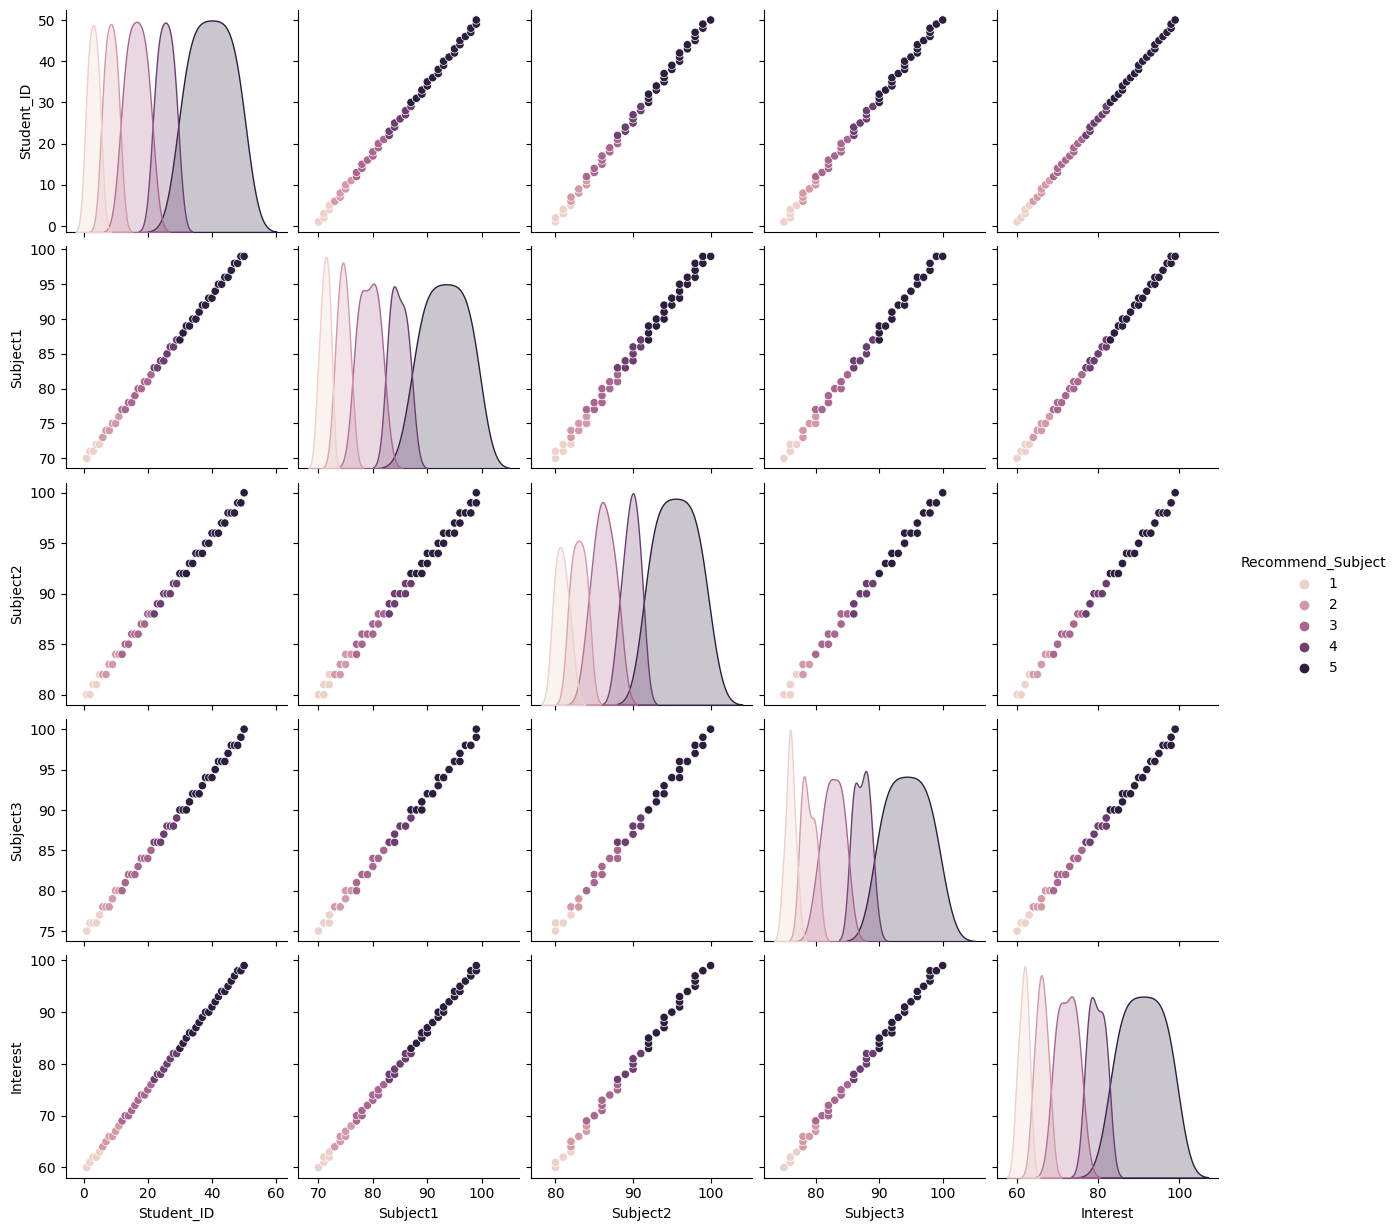

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df,hue='Recommend_Subject')
plt.show()

In [ ]:
X=df.iloc[:,1:-1].values
y=df.iloc[:,-1].values

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
classifier = DecisionTreeClassifier(random_state=42)
classifier.fit(X_train_scaled, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
y_pred = classifier.predict(X_test_scaled)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)

   Actual  Predicted
0       3          3
1       5          5
2       5          5
3       5          5
4       3          3
5       5          5
6       4          4
7       4          4
8       5          5
9       3          3


In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

1.0

In [ ]:
import pickle
with open('model.pkl', 'wb') as file:
    pickle.dump({'model': classifier, 'scaler': scaler}, file)

In [ ]:
def function(data):
  subject={5:'Digital Electronics',4:'Material Science',3:'Sensors and Instruments',2:'Laser System and Application',1:'Energy Science and Engineering'}
  new_data=data[:3]
  new_data.append(sum(data)/len(data))
  with open('model.pkl', 'rb') as file:
      saved_model = pickle.load(file)
      loaded_classifier = saved_model['model']
      loaded_scaler = saved_model['scaler']
  return subject[loaded_classifier.predict(loaded_scaler.transform([new_data]))[0]]

print(function([85,88,89,82,85]))

Material Science
